# NER
#### Explanation:



#### Instructions:

For model installation run: 
> pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_ner_bionlp13cg_md-0.5.3.tar.gz


In [14]:
import os
import pickle

pickle_file_path = os.path.join('..', 'data', 'dataset_5k.pickle')

with open(pickle_file_path, "rb") as pickle_file:
    data = pickle.load(pickle_file)

len(data)

5000

In [15]:
from tqdm import tqdm
import spacy
import pickle
import os

nlp = spacy.load("en_ner_bionlp13cg_md")

entity_list = []

for doc in tqdm(data, desc="Verarbeitung von Dokumenten"):
    if 'abstract_inverted_index' in doc and doc['abstract_inverted_index']:

        doc_entities = {'ID': doc['id'], 'hasGene_GeneProduct': [], 'hasCEL': [], 'hasORGANISM': [], 'hasORGAN': []}

        for key in doc['abstract_inverted_index']:
            text_for_key = key.lower()  
            if text_for_key:
                key_doc = nlp(text_for_key)

                for ent in key_doc.ents:
                    if ent.label_ == "GENE_OR_GENE_PRODUCT":
                        doc_entities['hasGene_GeneProduct'].append(ent.text)
                    elif ent.label_ == "CELL":
                        doc_entities['hasCEL'].append(ent.text)
                    elif ent.label_ == "ORGANISM":
                        doc_entities['hasORGANISM'].append(ent.text)
                    elif ent.label_ == "ORGAN":
                        doc_entities['hasORGAN'].append(ent.text)

        entity_list.append(doc_entities)

pickle_file_path = os.path.join('..', 'data', 'NER_data.pickle')
with open(pickle_file_path, 'wb') as pickle_file:
    pickle.dump(entity_list, pickle_file)

print(f"Die Ergebnisliste wurde in der Datei '{pickle_file_path}' gespeichert.")


Verarbeitung von Dokumenten: 100%|██████████| 5000/5000 [41:29<00:00,  2.01it/s]  

Die Ergebnisliste wurde in der Datei '../data/NER_data.pickle' gespeichert.


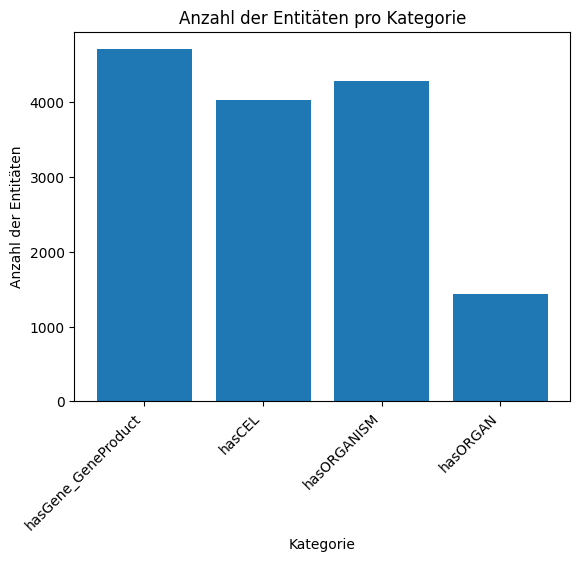

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

categories_counter = Counter()
for entity_dict in entity_list:
    for category, entities in entity_dict.items():
        if category != 'ID':
            categories_counter[category] += len(entities)

categories, counts = zip(*categories_counter.items())

plt.bar(categories, counts)
plt.xlabel('Kategorie')
plt.ylabel('Anzahl der Entitäten')
plt.title('Anzahl der Entitäten pro Kategorie')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [18]:

with open(pickle_file_path, "rb") as pickle_file:
    data = pickle.load(pickle_file)

len(data)

4497